In [4]:
%matplotlib inline
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
#import healpy as hp
import numpy as np
import h5py
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:90% !important; }</style>"))


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
list_cube_fake = []
with h5py.File('./Samples/Fake_Good_0.h5', 'r') as fh5:
    cube_fake = np.array(fh5['data'])
    list_cube_fake.append(cube_fake)

In [6]:
list_cube_real = []
with h5py.File('./Samples/Real_0.h5', 'r') as fh5:
    cube_real = np.array(fh5['data'])
    list_cube_real.append(cube_real)

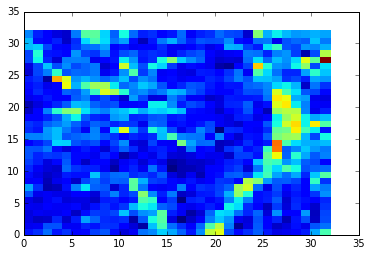

In [8]:
plt.figure()
plt.pcolormesh(list_cube_fake[0][:,:,0])

(<matplotlib.figure.Figure at 0x7f271719a048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f27527b9898>)

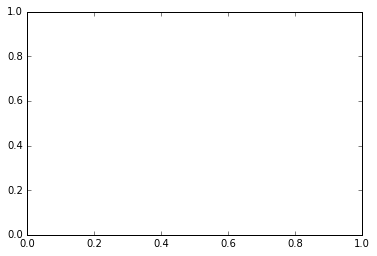

In [9]:
plt.subplots(nrows=1)

In [11]:
volume = list_cube_real[0]
print (volume.max(), volume.min())

3.078628 -1.0


16
16


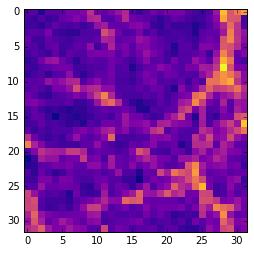

In [13]:
fig, ax = plt.subplots()
ax.index = volume.shape[0] // 2
print(ax.index)
ax.imshow(volume[ax.index], interpolation='nearest', cmap=plt.cm.plasma)
print(ax.index)
ax.images[0].set_array(volume[ax.index])

In [14]:
xs, ys, zs = np.meshgrid(range(32),range(32),range(32))

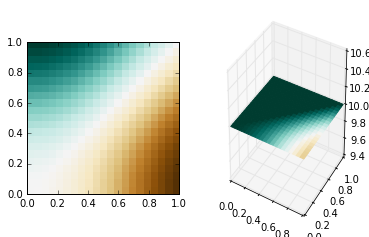

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# create a 21 x 21 vertex mesh
xx, yy = np.meshgrid(np.linspace(0,1,21), np.linspace(0,1,21))

# create vertices for a rotated mesh (3D rotation matrix)
X =  xx 
Y =  yy
Z =  10*np.ones(X.shape)

# create some dummy data (20 x 20) for the image
data = np.cos(xx) * np.cos(xx) + np.sin(yy) * np.sin(yy)

# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot(121)
ax1.imshow(data, cmap=plt.cm.BrBG, interpolation='nearest', origin='lower', extent=[0,1,0,1])

# show the 3D rotated projection
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=plt.cm.BrBG(data), shade=False)

In [16]:
volume.shape

(32, 32, 32)

In [19]:
coords = [0, 32]
corners = []
for l1 in coords:
    for l2 in coords:
        for l3 in coords:
            corners.append([l1, l2, l3])
corners=np.array(corners)
print(corners.shape)
pairs = []
for p1 in range(corners.shape[0]):
    for p2 in range(corners.shape[0]):
        pairs.append([corners[p1,:], corners[p2,:]])
pairs =  np.array(pairs)
print(pairs.shape)

(8, 3)
(64, 2, 3)


AttributeError: 'Axes3DSubplot' object has no attribute 'set_facecolor'

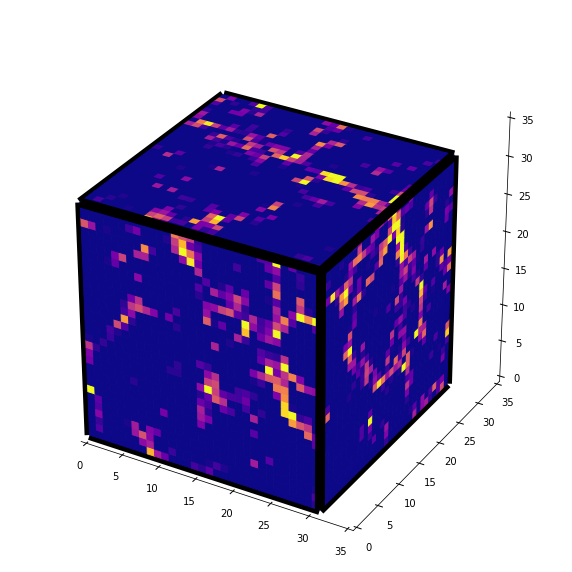

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
# ax.scatter3D(xs, ys, zs, c=volume, marker='s', s=40)
ax.plot_surface(xs[:,:,-1], ys[:,:,-1], zs[:,:,-1], rstride=1, cstride=1, facecolors=plt.cm.plasma(volume[:,:,0]), shade=False, lw=2, edgecolor='r')
ax.plot_surface(xs[:,-1,:], ys[:,-1,:], zs[:,-1,:], rstride=1, cstride=1, facecolors=plt.cm.plasma(volume[:,0,:]), shade=False)
ax.plot_surface(xs[0,:,:], ys[0,:,:], zs[0,:,:], rstride=1, cstride=1, facecolors=plt.cm.plasma(volume[0,:,:]), shade=False)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

m2=31
color_wire='k'
ax.plot_wireframe([0, m2], [0, 0], [0, 0], lw=10, color=color_wire, zorder=0)
ax.plot_wireframe([0, 0], [0, 0], [0, m2], lw=10, color=color_wire, zorder=0)
ax.plot_wireframe([0, m2], [0, 0], [m2, m2], lw=10, color=color_wire, zorder=0)
ax.plot_wireframe([m2, m2], [0, 0], [m2, 0], lw=10, color=color_wire, zorder=0)
ax.plot_wireframe([m2, m2], [0, m2], [0, 0], lw=10, color=color_wire, zorder=0)
ax.plot_wireframe([m2, m2], [0, m2], [m2, m2], lw=10, color=color_wire, zorder=0)
ax.plot_wireframe([m2, m2], [m2,m2], [0, m2], lw=10, color=color_wire, zorder=0)
ax.plot_wireframe([m2, 0], [m2,m2], [m2, m2], lw=10, color=color_wire, zorder=0)
ax.plot_wireframe([0, 0], [m2,0], [m2, m2], lw=10, color=color_wire, zorder=0)
ax.set_facecolor('black')

In [21]:
import matplotlib.animation as animation
animation.FuncAnimation?

In [22]:
import matplotlib
matplotlib.__version__

'1.5.1'

In [27]:
import mlab

TypeError: scatter() missing 1 required positional argument: 'ys'

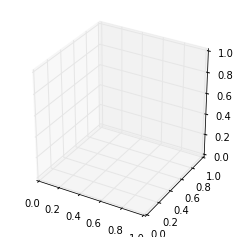

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
N1 = 10
N2 = 10
N3 = 10
ma = np.random.choice([0,1], size=(N1,N2,N3), p=[0.99, 0.01])

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('equal')

ax.scatter3D(xs)

plt.show()

In [33]:
import imageio
images = []
for i in range(32):
    #images.append(imageio.imread(filename))
    imageio.imsave('picture_' + str(i) + '.png', volume[i, :, :])
    images.append(imageio.imread('picture_' + str(i) + '.png'))
imageio.mimsave('movie.gif', images)

saved image_0.png
saved image_1.png
saved image_2.png
saved image_3.png
saved image_4.png
saved image_5.png
saved image_6.png
saved image_7.png
saved image_8.png
saved image_9.png
saved image_10.png
saved image_11.png
saved image_12.png
saved image_13.png
saved image_14.png
saved image_15.png
saved image_16.png
saved image_17.png
saved image_18.png
saved image_19.png


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


saved image_20.png
saved image_21.png
saved image_22.png
saved image_23.png
saved image_24.png
saved image_25.png
saved image_26.png
saved image_27.png
saved image_28.png
saved image_29.png
saved image_30.png
saved image_31.png


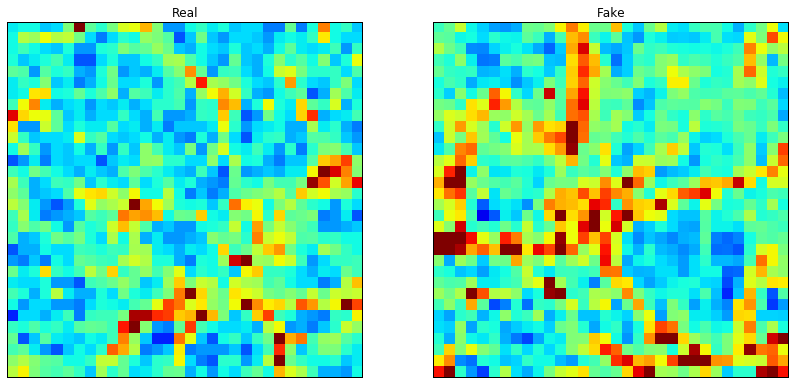

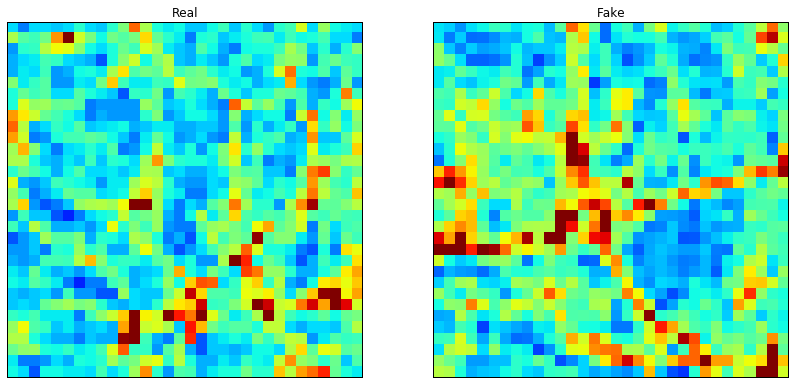

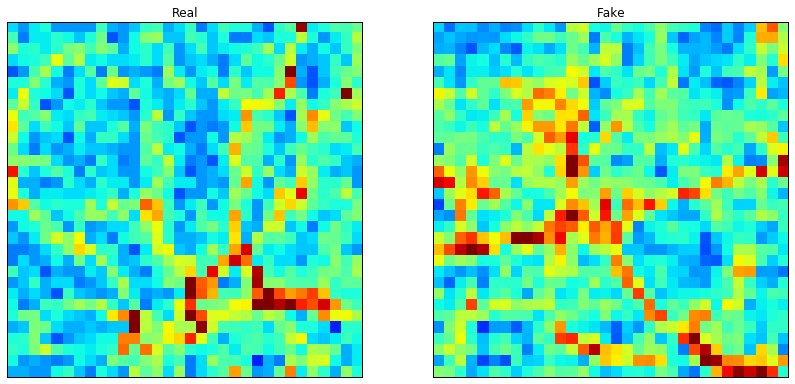

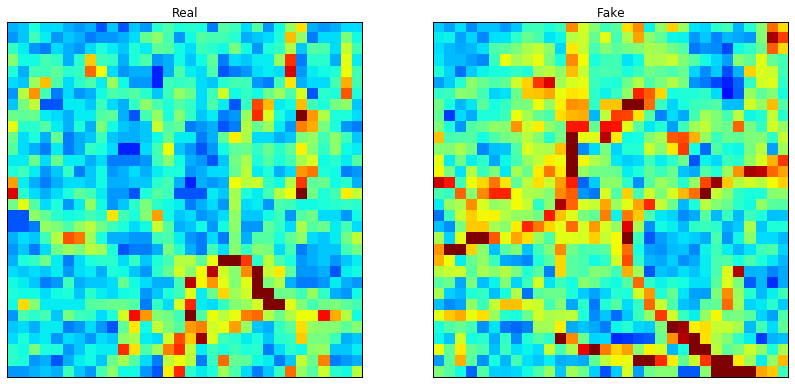

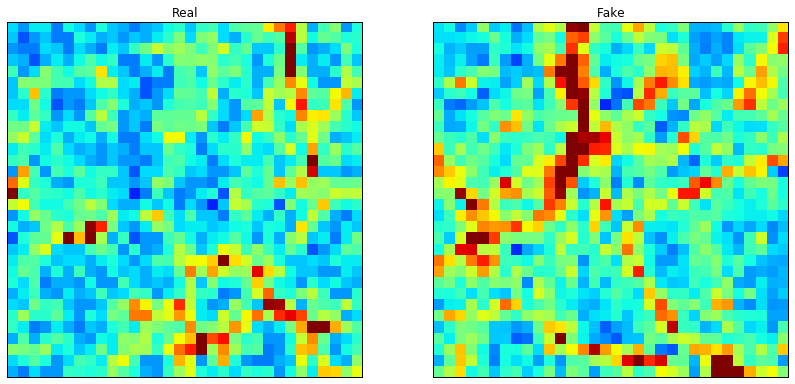

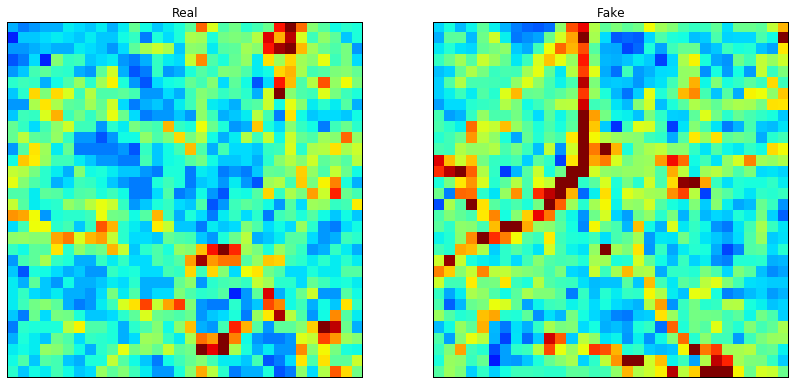

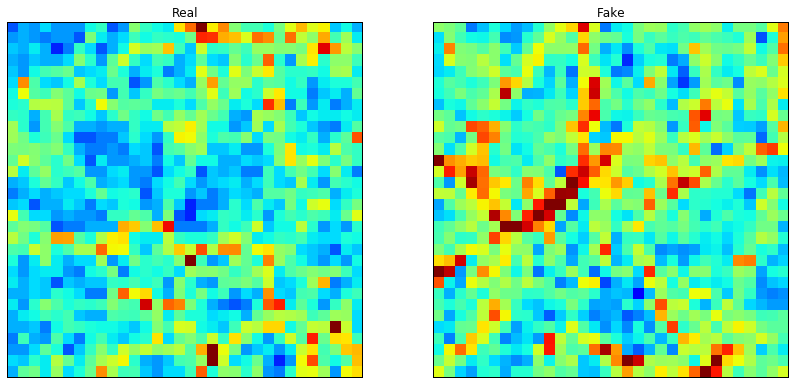

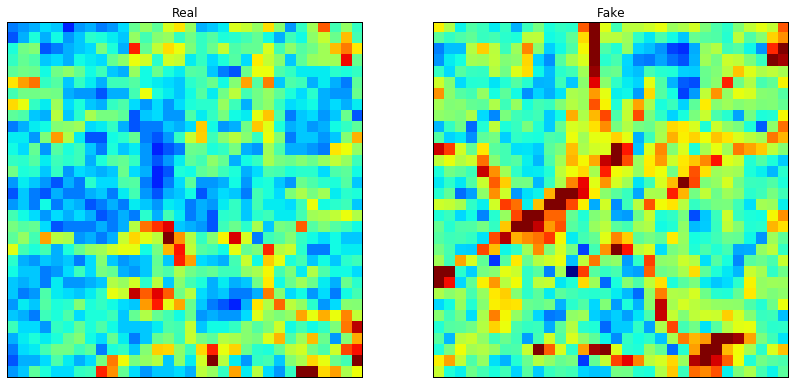

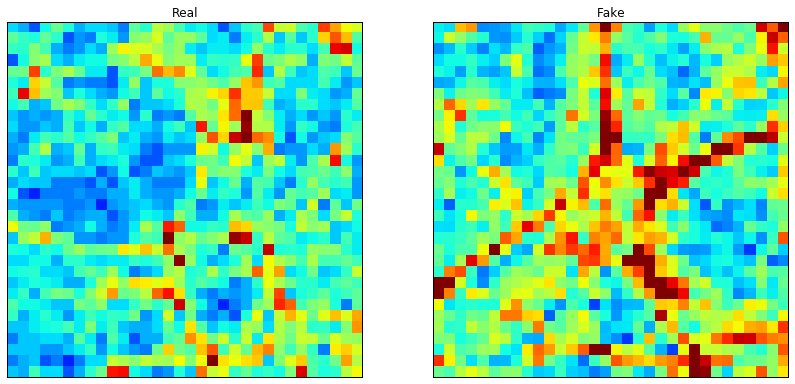

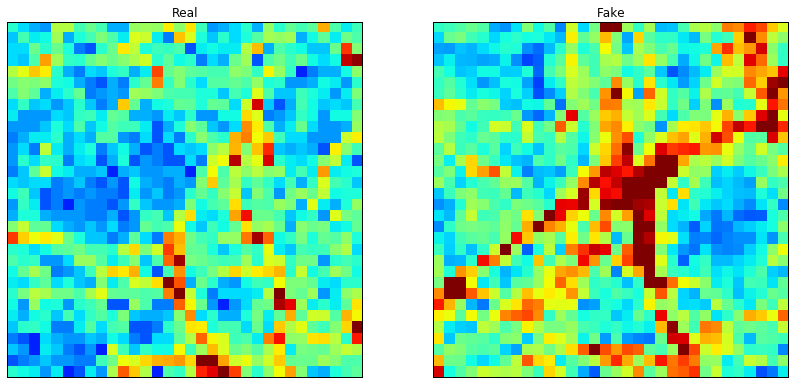

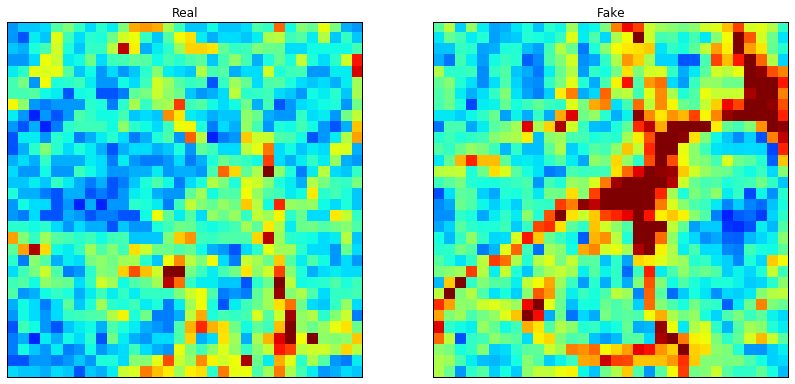

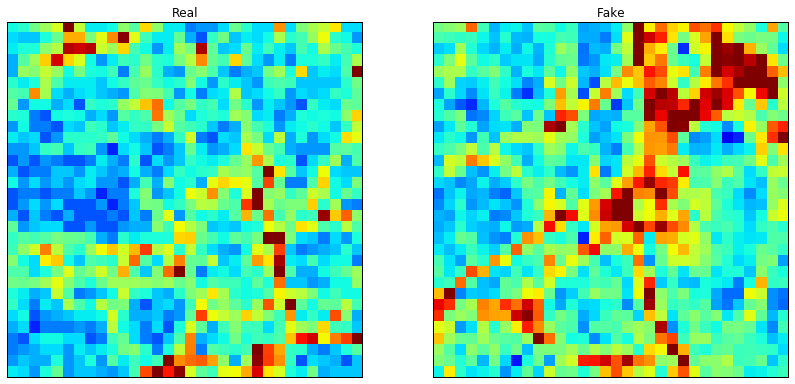

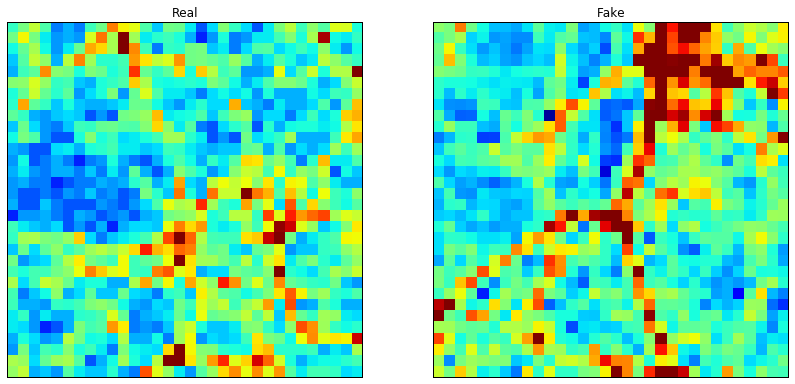

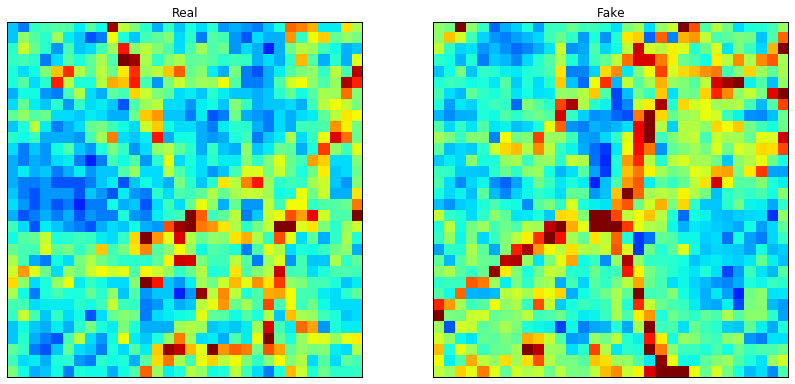

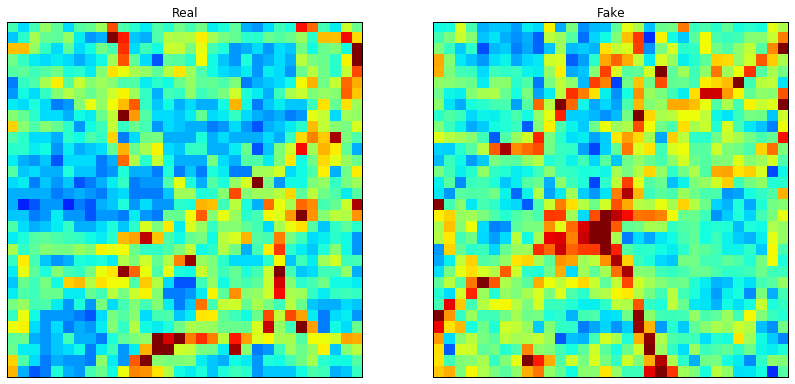

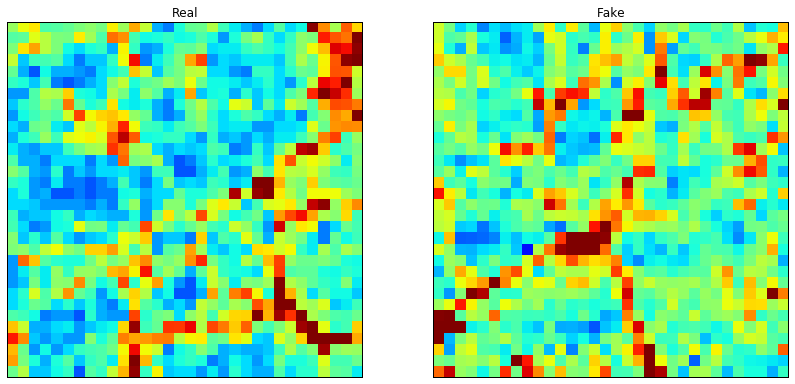

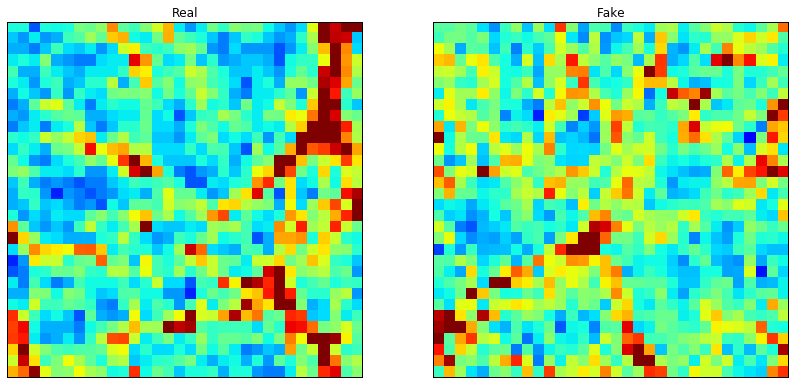

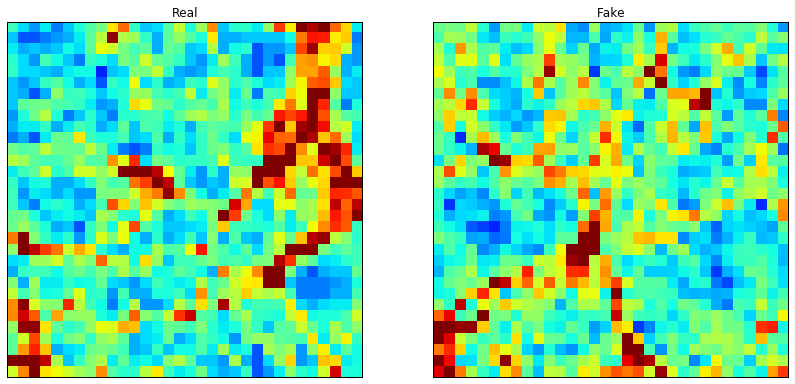

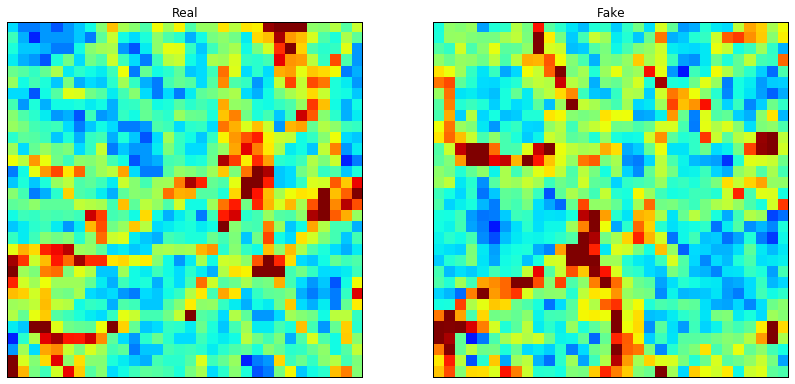

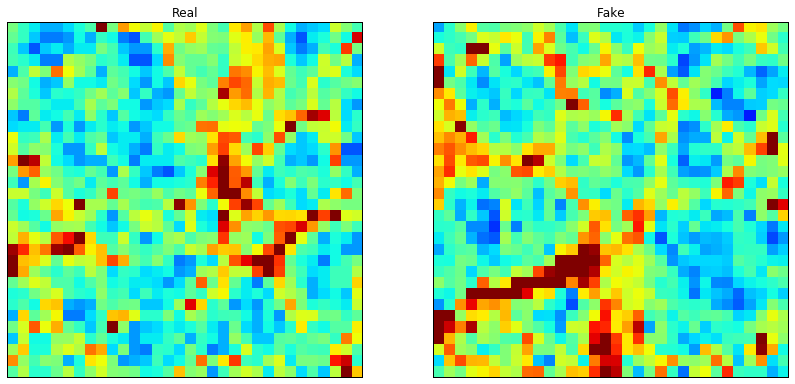

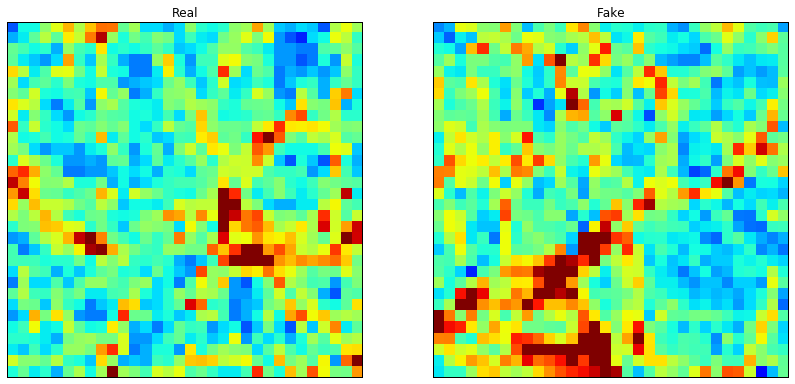

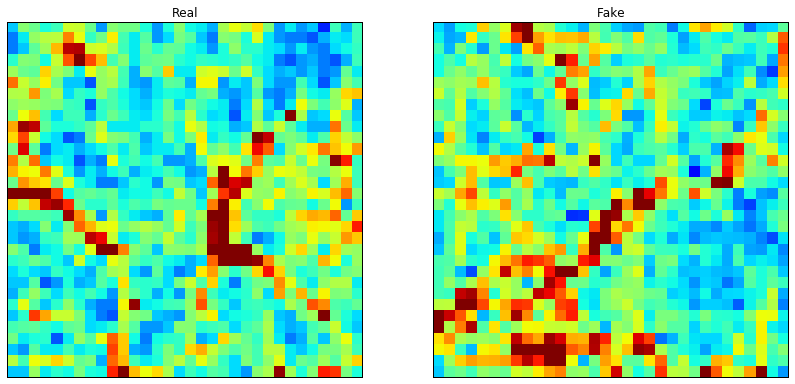

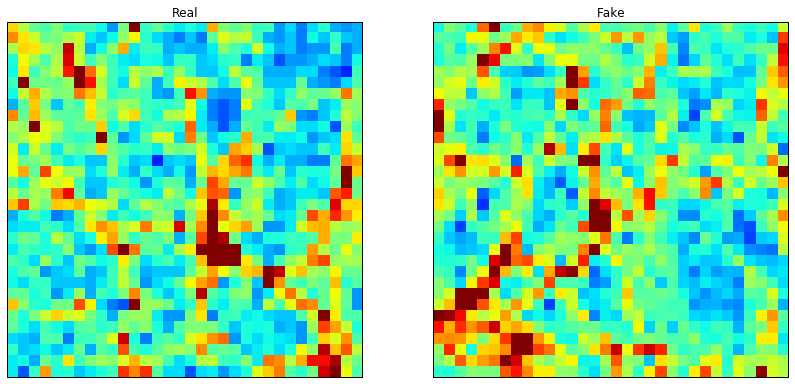

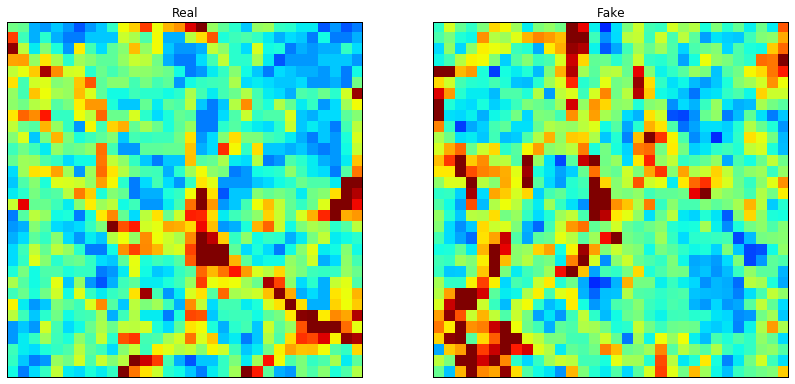

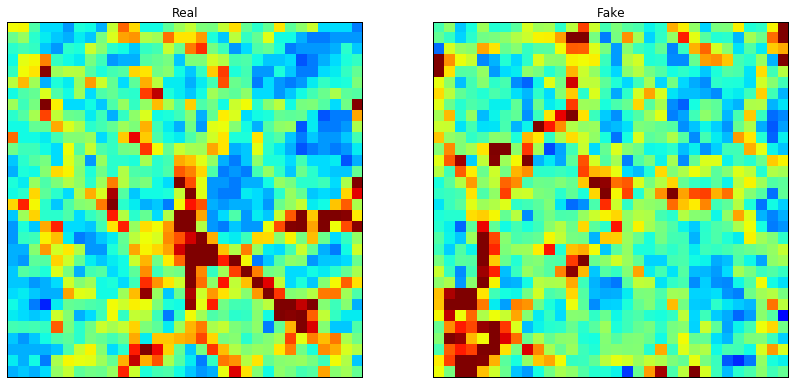

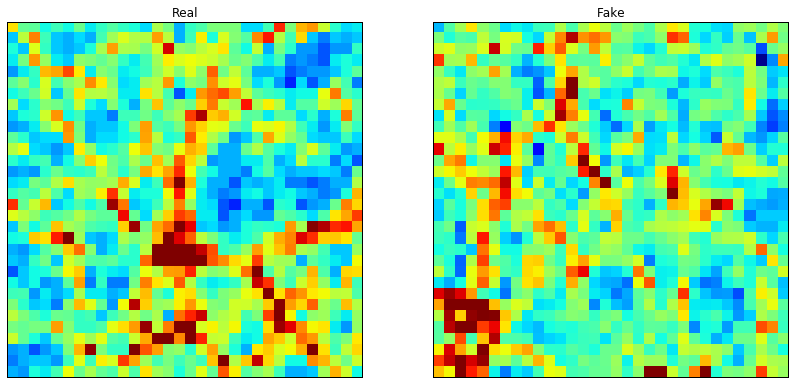

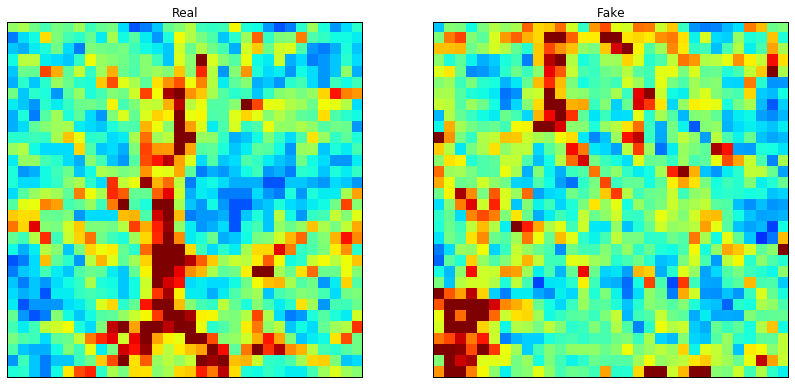

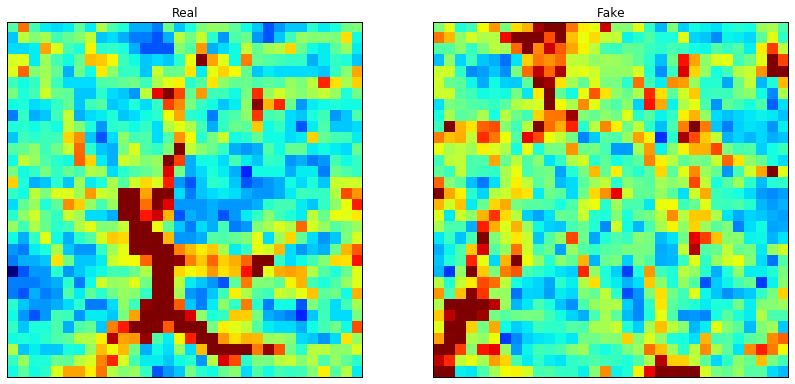

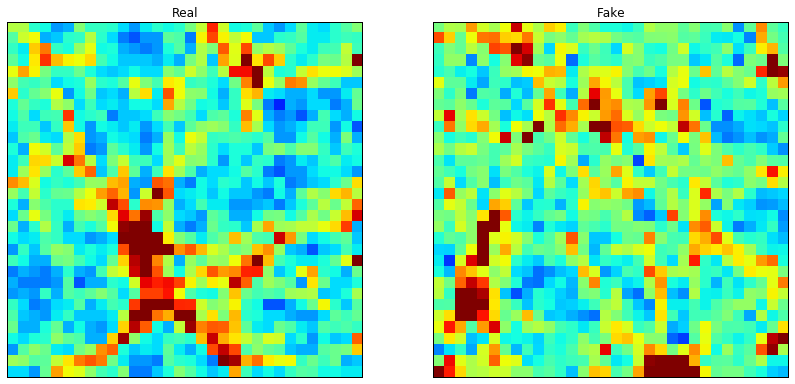

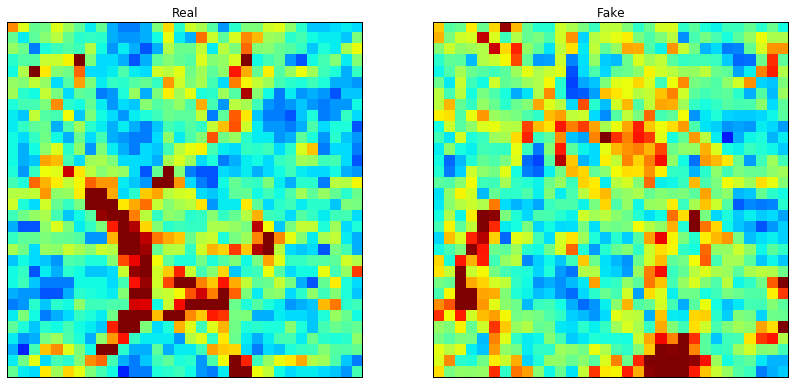

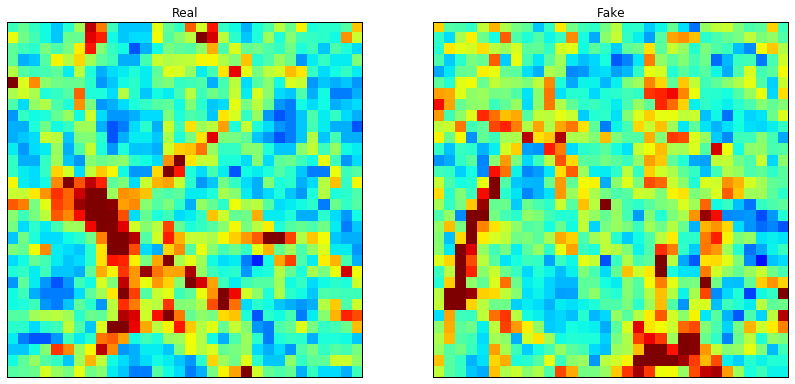

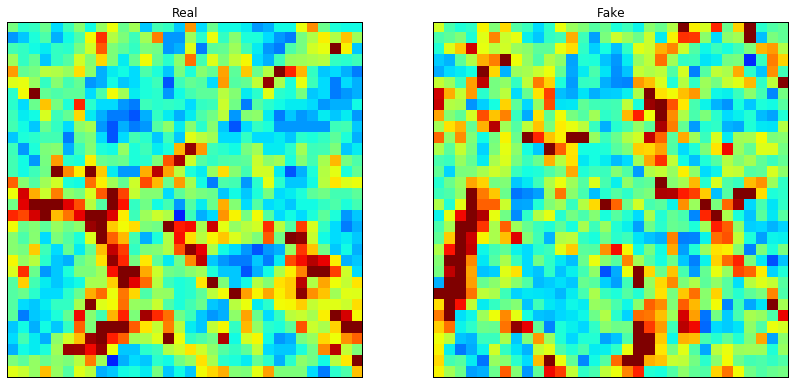

In [43]:
import numpy as np
import pylab as pl
import matplotlib.animation as animation
import h5py
import imageio
import os


list_cube_fake = []
with h5py.File('./Samples/Fake_Good_0.h5', 'r') as fh5:
    cube_fake = np.array(fh5['data'])
    list_cube_fake.append(cube_fake)

list_cube_real = []
with h5py.File('./Samples/Real_0.h5', 'r') as fh5:
    cube_real = np.array(fh5['data'])
    list_cube_real.append(cube_real)

volume1 = list_cube_real[0]
volume2 = list_cube_fake[0]

with imageio.get_writer('movie_black.gif', mode='I') as writer:
    list_img=[]
    for di in range(32):

        pl.figure(figsize=(14,8))
        pl.subplot(1,2,1)
        pl.imshow(volume1[di], interpolation='nearest')#, cmap=pl.cm.plasma)
        pl.clim(-1.0, 1.0)
        pl.xticks([]); pl.yticks([])
        pl.title('Real')

        pl.subplot(1,2,2)
        pl.imshow(volume2[di], interpolation='nearest')#, cmap=pl.cm.plasma)
        pl.clim(-1.0, 1.0)
        pl.xticks([]); pl.yticks([])
        pl.title('Fake')

        pl.gcf().set_facecolor('white')

        # pl.show()

        fname='image_{:d}.png'.format(di)
        pl.savefig(fname, facecolor=pl.gcf().get_facecolor())
        print('saved {:s}'.format(fname))
        image = imageio.imread(fname)
        list_img.append(image)
        writer.append_data(image)
        os.remove(fname)